### Drawdown

 
به عنوان **بدترین بازده** تعریف می شود که اگر در بالاترین نقطه قیمتی بخریم و در پایین ترین نقطه بفروشیم، چه ضرری را تجربه می کنیم.

**زیان بالقوه** را اندازه گیری می کند و بنابراین یک **معیار ریسک نزولی** است.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
%load_ext autoreload
%autoreload 2
%matplotlib inline
# برای رسم نمودار ها از این استایل استفاده میکنیم
plt.style.use("seaborn-dark")  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Load the data set 
rets = pd.read_csv("Portfolios_Formed_on_monthly.csv", index_col=0, parse_dates=True, na_values=-99.99)

rets = rets[["Lo 10", "Hi 10"]] / 100
rets.columns = ["Small Caps", "Large Caps"]
rets.head()

,Small Caps,Large Caps
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [7]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [8]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")   
rets.head()

,Small Caps,Large Caps
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [9]:
rets["2008"]

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_14652\1232546118.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rets["2008"]


,Small Caps,Large Caps
2008-01-01,-0.0436,-0.0490
2008-02-01,-0.0203,-0.0250
2008-03-01,-0.0440,-0.0122
2008-04-01,0.0027,0.0492
2008-05-01,0.0286,0.0161
2008-06-01,-0.0816,-0.1015
2008-07-01,-0.0079,-0.0140
2008-08-01,0.0110,0.0087
2008-09-01,-0.1274,-0.1155
2008-10-01,-0.2041,-0.1763


In [10]:
rets.loc["2008"]

,Small Caps,Large Caps
2008-01-01,-0.0436,-0.0490
2008-02-01,-0.0203,-0.0250
2008-03-01,-0.0440,-0.0122
2008-04-01,0.0027,0.0492
2008-05-01,0.0286,0.0161
2008-06-01,-0.0816,-0.1015
2008-07-01,-0.0079,-0.0140
2008-08-01,0.0110,0.0087
2008-09-01,-0.1274,-0.1155
2008-10-01,-0.2041,-0.1763


In [11]:
rets.index = rets.index.to_period('M')
rets.head()

,Small Caps,Large Caps
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [12]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Small Caps  1110 non-null   float64
 1   Large Caps  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [13]:
rets.describe()

,Small Caps,Large Caps
count,1110.000000,1110.000000
mean,0.017598,0.008870
std,0.106288,0.053900
min,-0.291400,-0.284300
25%,-0.027350,-0.017025
50%,0.010450,0.011400
75%,0.049950,0.037650
max,1.342900,0.377900


## Computing Drawdowns

**مراحل محاسبه**

1. تبدیل سری زمانی بازده ها به یک سری زمانی که بر اساس شاخص ثروت باشه
2. محاسبه سری زمانی نقاط قله
3. محاسبه اختلاف بین نقاط قله و قیمت در هر زمان


In [15]:
# ما از 100 دلار شروع می کنیم و می بینیم که با توجه به بازده چگونه تکامل می یابند
wealth_index = 100 * (1 + rets).cumprod()
wealth_index.tail()

,Small Caps,Large Caps
2018-08,2.298938e+08,417591.514608
2018-09,2.260316e+08,421224.560785
2018-10,2.033832e+08,393550.107141
2018-11,1.959597e+08,403506.924852
2018-12,1.659583e+08,367594.808540


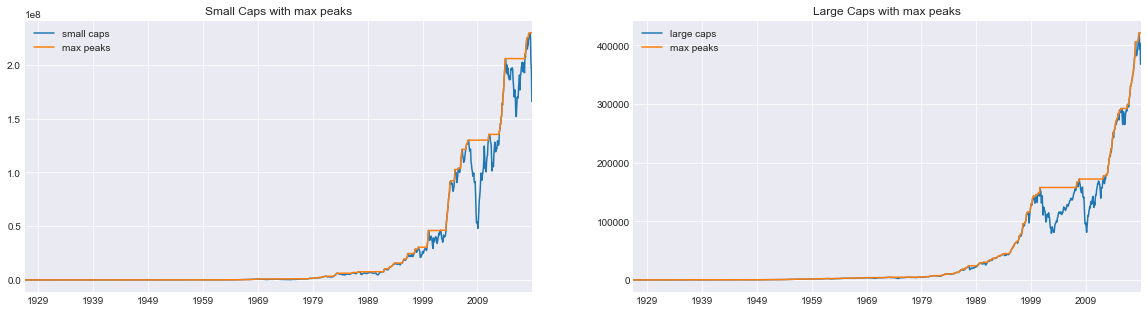

In [17]:
f, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=2)
# رسم شاخص ثروت
wealth_index["Small Caps"].plot(grid=True, ax=ax[0], label="small caps", legend=True)
wealth_index["Large Caps"].plot(grid=True, ax=ax[1], label="large caps", legend=True )
# با استفاده از تابع تجمعی ماکزیمم ما میتوانیم به صورت تجمعی نقاط حداکثری در نمودار و سری زمانی را بیابیم
previous_peaks = wealth_index.cummax()
previous_peaks["Small Caps"].plot(title="Small Caps with max peaks", grid=True, ax=ax[0], label="max peaks", legend=True)
previous_peaks["Large Caps"].plot(title="Large Caps with max peaks", grid=True, ax=ax[1], label="max peaks", legend=True)
plt.legend()
plt.show()

In [28]:
# سقوط حداکثری  صرفاً تفاوت شاخص ثروت از  حداکثر (آخرین) اوج است، یعنی:

drawdown = wealth_index - previous_peaks                    #(*میزان عددی*)
drawdown_pc = (wealth_index - previous_peaks) / previous_peaks #(*میزان درصدی*)
drawdown


,Small Caps,Large Caps
1926-07,0.000000e+00,0.000000
1926-08,0.000000e+00,0.000000
1926-09,0.000000e+00,0.000000
1926-10,-5.060665e+00,-2.620254
1926-11,-5.836754e+00,0.000000
...,...,...
2018-08,0.000000e+00,0.000000
2018-09,-3.862216e+06,0.000000
2018-10,-2.651058e+07,-27674.453644
2018-11,-3.393407e+07,-17717.635933


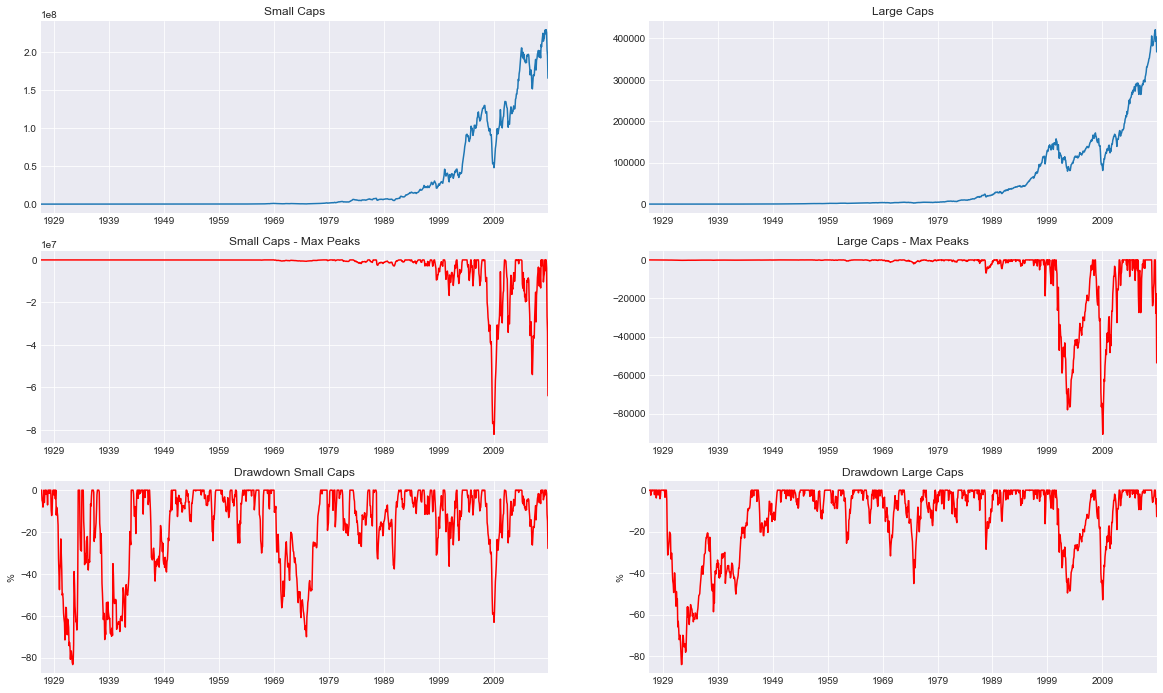

In [29]:
f, ax = plt.subplots(3,2,figsize=(20,12))

# رسم شاخص ثروت
wealth_index["Small Caps"].plot(grid=True, title="Small Caps", ax=ax[0,0]) 
wealth_index["Large Caps"].plot(grid=True, title="Large Caps", ax=ax[0,1]) 

# به صورت عددی
(wealth_index - previous_peaks)["Small Caps"].plot(grid=True, title="Small Caps - Max Peaks", ax=ax[1,0], color='r')
(wealth_index - previous_peaks)["Large Caps"].plot(grid=True, title="Large Caps - Max Peaks", ax=ax[1,1], color='r')

# به صورت درصدی
drawdown = (wealth_index - previous_peaks) / previous_peaks
(drawdown["Small Caps"]*100).plot(grid=True, title="Drawdown Small Caps", ax=ax[2,0], color='r')
(drawdown["Large Caps"]*100).plot(grid=True, title="Drawdown Large Caps", ax=ax[2,1], color='r')
ax[2,0].set_ylabel("%")
ax[2,1].set_ylabel("%")
plt.show()

به عنوان مثال میبینیم که در بحران سال 1929 تقریبا 80 درصد کسانی که سرمایه گذاری داشته اند از بین رفت.

In [30]:
print("1929 crisis: ")
print( "{}%" .format( drawdown.min().round(2)*100) )
print("--------------------------------")
print("Date max drawdown:")
print( drawdown.idxmin() )

1929 crisis: 
Small Caps   -83.0
Large Caps   -84.0
dtype: float64%
--------------------------------
Date max drawdown:
Small Caps    1932-05
Large Caps    1932-05
dtype: period[M]


دو کاهش بزرگ دیگر در طول بحران **دات کام** در آغاز قرن جدید و به دلیل بحران **برادران لیمن** رخ داد:

In [31]:
print("Dot Com crisis: ")
print( "{}%" .format(drawdown["1990":"2005"].min().round(2)*100) )
print("-----------------------------------------")
print("Date max drawdown:")
print( drawdown["1990":"2005"].idxmin())

Dot Com crisis: 
Small Caps   -38.0
Large Caps   -50.0
dtype: float64%
-----------------------------------------
Date max drawdown:
Small Caps    1990-12
Large Caps    2002-09
dtype: period[M]


In [32]:
print("Lehman Brothers crisis: ")
print( "{}%" .format( drawdown["2005":].min().round(2)*100) )
print("-----------------------------------------")
print("Date max drawdown:")
print( drawdown["2005":].idxmin() )

Lehman Brothers crisis: 
Small Caps   -63.0
Large Caps   -53.0
dtype: float64%
-----------------------------------------
Date max drawdown:
Small Caps    2009-02
Large Caps    2009-02
dtype: period[M]


# Creating a Drawdown Function


In [33]:
#add to msj

def drawdown(return_series: pd.Series):
    """یک سری زمانی بازده را دریافت میکند
       و سه ستون شاخص, پیک شاخصی و حداکثر سقوط را خروجی میدهد
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})
